In [7]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist   
(x_train,y_train),(x_test,y_test)=mnist.load_data()

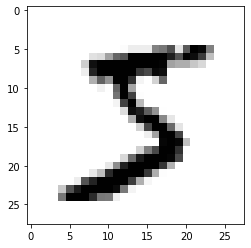

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)  # x_train[0] is a tensor
#colormap=plot.colormap.binary means it is only black and white image not a color image
plt.show()

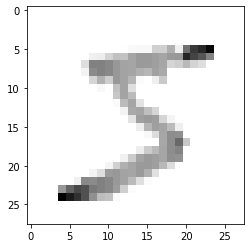

In [4]:
#normalize data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)  # x_train[0] is a tensor
#colormap=plot.colormap.binary means it is only black and white image not a color image
plt.show()

values gets scaled between 0 and 1.

In [51]:
def data_summary(x_train, y_train, x_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', x_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', x_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)
    
# Check state of dataset
data_summary(x_train, y_train, x_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [44]:
# we are gonna use sequential model which is feed-forward

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(keras.layers.Flatten())  # input layer
model.add(Dense(128,activation=tf.nn.relu)) # adding two hidden layer
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))  # 10-no.of classification, use softmax for probabilty distribution

# Compile model
# neural network doesn't attempt to optimize for accuracy, it doesn't try to maximize accuracy,it is always trying to minimize loss
# https://keras.io/optimizers/
# https://keras.io/losses/
# https://keras.io/metrics/
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train model
model.fit(x_train, y_train,
          epochs=3,
          verbose=1)
# loss:0.0157 and accu:0.9947

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2646 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1051 - accuracy: 0.9679
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0711 - accuracy: 0.9771


In [45]:
val_loss,val_acc=model.evaluate(x_test,y_test,verbose=0)
print(val_loss,val_acc)
# loss:0.10483780243741495 acc:0.9769999980926514

0.09943734989250079 0.9691


In [46]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dense_13 (Dense)             multiple                  16512     
_________________________________________________________________
dense_14 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.save('epic_num_reader.model') # saving model by giving name

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [49]:
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [58]:
predictions=new_model.predict([x_test])
# predictions.shape = (10000, 10)
# this is probability distribution

In [61]:
import numpy as np 
np.argmax(predictions[2])      # predictions of x_test[9999]

1

<function matplotlib.pyplot.show(*args, **kw)>

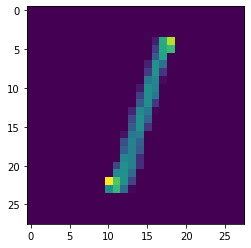

In [62]:
plt.imshow(x_test[2])
plt.show